<a href="https://colab.research.google.com/github/Anukriti2001/Anukriti/blob/master/Copy_of_Daily_Exchange_Rates_per_Euro_1999_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THINGS TO DO:**


1. Results visualization
2. Model validation
3. Convert to multivariate



Importing the Necessary Libraries

In [ ]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for multidimensional arrays
import re #for regular expressions
from numpy import log
import matplotlib.pyplot as plt #for visualization

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 42.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Loading and understanding the Dataset

In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/euro-daily-hist_1999_2022_updated.csv', index_col = False)

In [ ]:
#First few rows of the dataset
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,15-06-2022,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.529,18.0465,1.0431,16.7111
1,14-06-2022,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.566,18.0600,1.0452,16.7959
2,13-06-2022,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.425,18.0495,1.0455,16.8070
3,10-06-2022,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.774,18.0116,1.0578,16.5209
4,09-06-2022,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.079,18.5104,1.0743,16.4132


In [ ]:
#Dimensions of the dataset
data.shape

(6006, 41)

In [ ]:
#Columns of the data
col = data.columns
col

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

Data Preprocessing

1. Renaming columns
2. Keeping necessary columns
3. Converting to appropriate data types
4. Treating missing values


In [ ]:
#Renaming the column names by removing the extra characters and changing the term 'Period/Unit' to 'Date'
data.rename(columns = lambda x: x.replace('[', ''), inplace=True)
data.rename(columns = lambda x: x.replace(']', ''), inplace=True)
data.rename(columns = lambda x : x.replace("Period\\Unit:", 'Date'), inplace = True)
data.head()

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,15-06-2022,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.529,18.0465,1.0431,16.7111
1,14-06-2022,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.566,18.0600,1.0452,16.7959
2,13-06-2022,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.425,18.0495,1.0455,16.8070
3,10-06-2022,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.774,18.0116,1.0578,16.5209
4,09-06-2022,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.079,18.5104,1.0743,16.4132


In [ ]:
#Keeping the Necessary Columns
cols = ['Date','Australian dollar ', 'Canadian dollar ', 'UK pound sterling ', 'Hong Kong dollar ', 'Japanese yen ', 'Korean won ', 'US dollar ', 'South African rand ']
df = data[cols]

In [ ]:
df.head()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand
0,15-06-2022,1.5051,1.3498,0.86328,8.1883,140.49,1346.86,1.0431,16.7111
1,14-06-2022,1.5174,1.3522,0.86578,8.2048,140.62,1346.72,1.0452,16.7959
2,13-06-2022,1.4998,1.3435,0.85850,8.2071,140.51,1349.93,1.0455,16.8070
3,10-06-2022,1.4845,1.3484,0.85048,8.3031,141.69,1344.25,1.0578,16.5209
4,09-06-2022,1.4985,1.3506,0.85653,8.4317,143.93,1348.99,1.0743,16.4132


In [ ]:
#Checking the datatype of the columns
df.dtypes

Date                    object
Australian dollar      float64
Canadian dollar        float64
UK pound sterling      float64
Hong Kong dollar       float64
Japanese yen           float64
Korean won             float64
US dollar              float64
South African rand     float64
dtype: object

In [ ]:
#Converting the 'Date' column to 'Datetime' datatype
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
#print(df['Date'].dt.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Converting the exchange rates column to float datatype
df["Australian dollar "] = pd.to_numeric(df["Australian dollar "])
df["Canadian dollar "] = pd.to_numeric(df["Canadian dollar "])   
df["UK pound sterling "] = pd.to_numeric(df["UK pound sterling "])
df["Hong Kong dollar "] = pd.to_numeric(df["Hong Kong dollar "])                  
df["Japanese yen "] = pd.to_numeric(df["Japanese yen "])            
df["Korean won "] = pd.to_numeric(df["Korean won "])              
df["US dollar "] = pd.to_numeric(df["US dollar "])               
df["South African rand "] = pd.to_numeric(df["South African rand "])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Checking the changed datatypes
df.dtypes

Date                   datetime64[ns]
Australian dollar             float64
Canadian dollar               float64
UK pound sterling             float64
Hong Kong dollar              float64
Japanese yen                  float64
Korean won                    float64
US dollar                     float64
South African rand            float64
dtype: object

In [ ]:
#df = df.set_index('Date')
df = df.sort_values(by = 'Date')

In [ ]:
df.head()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand
6005,1999-01-04,1.9100,1.8004,0.71110,9.1332,133.73,1398.59,1.1789,6.9358
6004,1999-01-05,1.8944,1.7965,0.71220,9.1341,130.96,1373.01,1.1790,6.7975
6003,1999-01-06,1.8820,1.7711,0.70760,9.1010,131.42,1359.54,1.1743,6.7307
6002,1999-01-07,1.8474,1.7602,0.70585,9.0131,129.43,1337.16,1.1632,6.8283
6001,1999-01-08,1.8406,1.7643,0.70940,9.0302,130.09,1366.73,1.1659,6.7855


In [ ]:
#Checking for Null and Empty Values
df.isnull().sum()

Date                   0
Australian dollar      0
Canadian dollar        0
UK pound sterling      0
Hong Kong dollar       0
Japanese yen           0
Korean won             0
US dollar              0
South African rand     0
dtype: int64

We observe that only two currencies - Chinese Yuan Renminbi and Indian Rupee have some missing values. The exchang rates for all other currencies are present in the dataset.

Exploratory Data Analysis

In [ ]:
df.head()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand
6005,1999-01-04,1.9100,1.8004,0.71110,9.1332,133.73,1398.59,1.1789,6.9358
6004,1999-01-05,1.8944,1.7965,0.71220,9.1341,130.96,1373.01,1.1790,6.7975
6003,1999-01-06,1.8820,1.7711,0.70760,9.1010,131.42,1359.54,1.1743,6.7307
6002,1999-01-07,1.8474,1.7602,0.70585,9.0131,129.43,1337.16,1.1632,6.8283
6001,1999-01-08,1.8406,1.7643,0.70940,9.0302,130.09,1366.73,1.1659,6.7855


In [ ]:
df.dtypes

Date                   datetime64[ns]
Australian dollar             float64
Canadian dollar               float64
UK pound sterling             float64
Hong Kong dollar              float64
Japanese yen                  float64
Korean won                    float64
US dollar                     float64
South African rand            float64
dtype: object

In [ ]:
df.describe()

,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand
count,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000,6006.000000
mean,1.578279,1.468409,0.773231,9.312711,127.286853,1349.293973,1.196977,11.751422
std,0.151216,0.097412,0.099714,1.223549,15.507395,163.354766,0.158085,3.717891
min,1.163900,1.213900,0.571100,6.436100,89.300000,938.670000,0.825200,6.078500
25%,1.480625,1.399825,0.679600,8.565850,116.860000,1247.362500,1.100600,8.624725
50%,1.598800,1.467600,0.796550,9.274200,128.460000,1330.365000,1.192300,10.876600
75%,1.671575,1.540900,0.862195,10.210075,135.400000,1434.932500,1.313600,14.957925
max,2.073500,1.812300,0.978550,12.470200,169.750000,1993.950000,1.599000,20.845200


In [ ]:
df['Date']

6005   1999-01-04
6004   1999-01-05
6003   1999-01-06
6002   1999-01-07
6001   1999-01-08
          ...    
4      2022-06-09
3      2022-06-10
2      2022-06-13
1      2022-06-14
0      2022-06-15
Name: Date, Length: 6006, dtype: datetime64[ns]

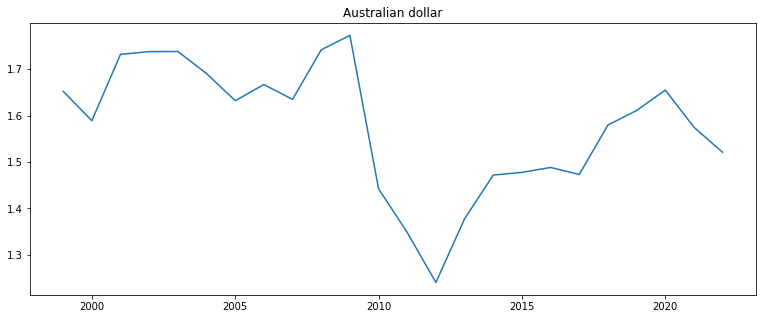

In [ ]:
#Plots
plt.figure(figsize=(13, 5))
plt.plot(df.groupby(df['Date'].dt.year)['Australian dollar '].mean())
plt.title('Australian dollar')
plt.show()

In [ ]:
df['rolling_mean'] = df['Australian dollar '].rolling(30).mean()
df['rolling_mean']

6005         NaN
6004         NaN
6003         NaN
6002         NaN
6001         NaN
          ...   
4       1.495727
3       1.496213
2       1.496497
1       1.497660
0       1.498563
Name: rolling_mean, Length: 6006, dtype: float64

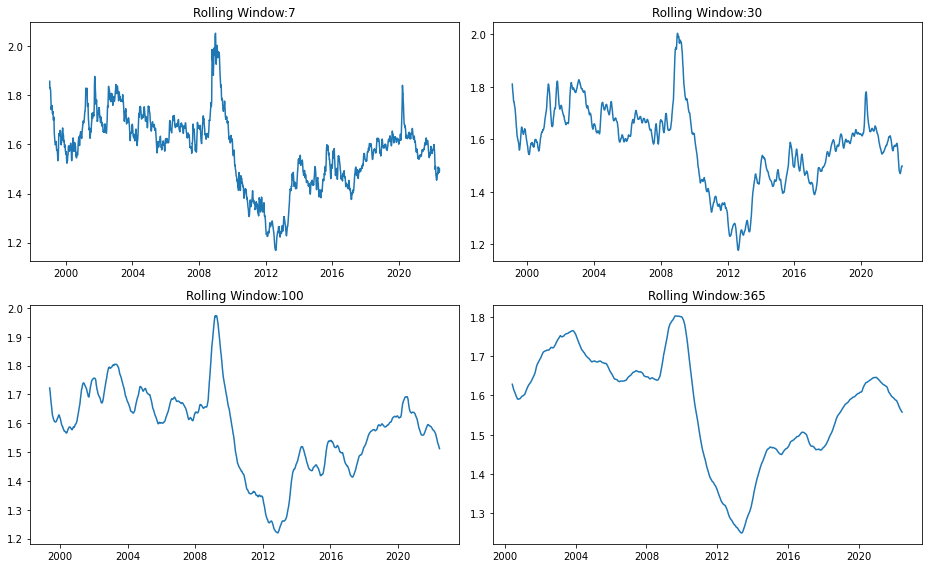

In [ ]:
plt.figure(figsize=(13, 8))

for i, rolling_mean in zip([1, 2, 3, 4], [7, 30, 100, 365]):
    
    plt.subplot(2, 2, i)
    plt.plot(df['Date'], df['Australian dollar '].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean))
plt.tight_layout()
plt.show()

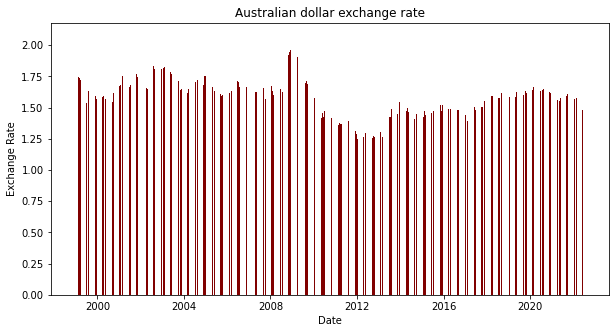

In [ ]:
#Bar graph
fig = plt.figure(figsize = (10, 5))
plt.bar( df['Date'], df['Australian dollar '], color ='maroon', width = 0.4)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.title("Australian dollar exchange rate")
plt.show()

Time Series Models

1. ARIMA model
2. Holt-Winter's Single Exponential Smoothening model
3. Holt-Winter's Double Exponential Smoothening model

Splitting data for training, testing and validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train = df['Date'][:4204]
y_train = df['Australian dollar '][:4204]
y_test = df['Australian dollar '][4204:]
X_test = df['Date'][4204:]
#X_train, X_rem, y_train, y_rem = train_test_split(df, df['Australian dollar '], test_size = 0.3, train_size = 0.7)

In [ ]:
######  ALTERNATE  ###########
X_train_1 = df['Date'][:4204]
y_train_1 = df['Australian dollar '][:4204]
y_test_1 = df['Australian dollar '][4204:]
X_test_1 = df['Date'][4204:]

In [ ]:
######  ALTERNATE  ###########
X_train_1

6005   1999-01-04
6004   1999-01-05
6003   1999-01-06
6002   1999-01-07
6001   1999-01-08
          ...    
1806   2015-05-29
1805   2015-06-01
1804   2015-06-02
1803   2015-06-03
1802   2015-06-04
Name: Date, Length: 4204, dtype: datetime64[ns]

In [ ]:
######  ALTERNATE  ###########
X_test_1

1801   2015-06-05
1800   2015-06-08
1799   2015-06-09
1798   2015-06-10
1797   2015-06-11
          ...    
4      2022-06-09
3      2022-06-10
2      2022-06-13
1      2022-06-14
0      2022-06-15
Name: Date, Length: 1802, dtype: datetime64[ns]

In [ ]:
######  ALTERNATE  ###########
print(X_train_1.shape), print(y_train_1.shape)
print(X_test_1.shape), print(y_test_1.shape)

(4204,)
(4204,)
(1802,)
(1802,)


(None, None)

In [ ]:
X_valid = X_test[:1328] 
X_test = X_test[1328:]
y_valid = y_test[:1328]
y_test = y_test[1328:]

In [ ]:
X_valid

1801   2015-06-05
1800   2015-06-08
1799   2015-06-09
1798   2015-06-10
1797   2015-06-11
          ...    
478    2020-08-06
477    2020-08-07
476    2020-08-10
475    2020-08-11
474    2020-08-12
Name: Date, Length: 1328, dtype: datetime64[ns]

In [ ]:
X_test

473   2020-08-13
472   2020-08-14
471   2020-08-17
470   2020-08-18
469   2020-08-19
         ...    
4     2022-06-09
3     2022-06-10
2     2022-06-13
1     2022-06-14
0     2022-06-15
Name: Date, Length: 474, dtype: datetime64[ns]

In [ ]:
y_valid

1801    1.4534
1800    1.4615
1799    1.4606
1798    1.4571
1797    1.4533
         ...  
478     1.6492
477     1.6403
476     1.6445
475     1.6406
474     1.6514
Name: Australian dollar , Length: 1328, dtype: float64

In [ ]:
y_test

473    1.6522
472    1.6525
471    1.6485
470    1.6447
469    1.6428
        ...  
4      1.4985
3      1.4845
2      1.4998
1      1.5174
0      1.5051
Name: Australian dollar , Length: 474, dtype: float64

In [ ]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.0 MB/s 


In [ ]:
import fast_ml.model_development

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(4204,)
(4204,)
(1328,)
(1328,)
(474,)
(474,)


(None, None)

In [ ]:
y_train

6005    1.9100
6004    1.8944
6003    1.8820
6002    1.8474
6001    1.8406
         ...  
1806    1.4338
1805    1.4341
1804    1.4342
1803    1.4321
1802    1.4618
Name: Australian dollar , Length: 4204, dtype: float64

ARIMA Model

Model Training

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Australian dollar '].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Number of lags: %f' %result[2])
print('Number of observations used for ADF Regression and Critical Values calculation : %f' %result[3])
print('Critical values: %f')
for key,val in result[4].items():
  print("\t", key," : ", val)


ADF Statistic: -2.789713
p-value: 0.059758
Number of lags: 5.000000
Number of observations used for ADF Regression and Critical Values calculation : 6000.000000
Critical values: %f
	 1%  :  -3.4314403499788564
	 5%  :  -2.8620218344631483
	 10%  :  -2.5670264780277776


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

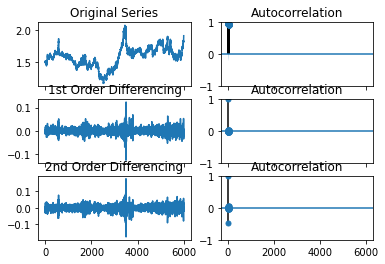

In [ ]:
fig, axes = plt.subplots(3,2, sharex = True)
#Original series
axes[0, 0].plot(df['Australian dollar ']); axes[0, 0].set_title('Original Series')
plot_acf(df['Australian dollar '], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Australian dollar '].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Australian dollar '].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Australian dollar '].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Australian dollar '].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

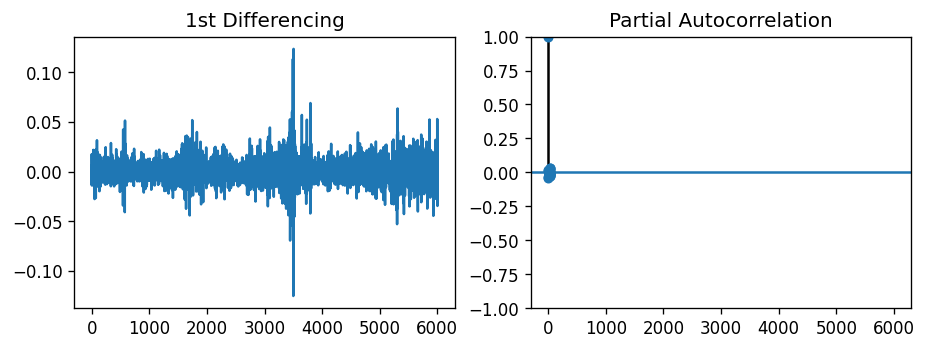

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Australian dollar '].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['Australian dollar '].diff().dropna(), ax=axes[1])

plt.show()

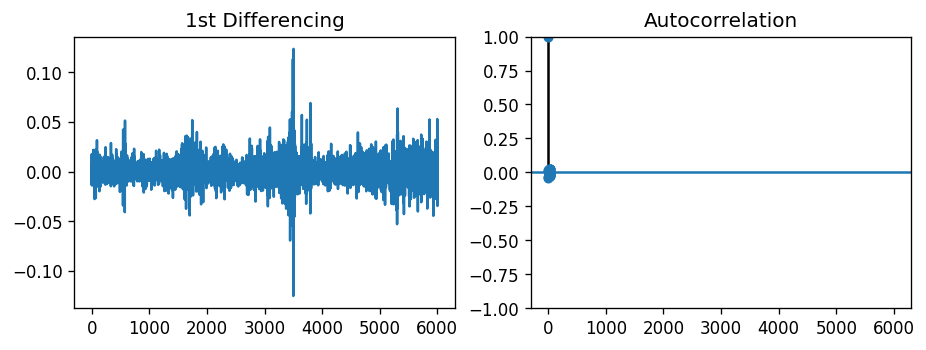

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Australian dollar '].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['Australian dollar '].diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Australian dollar '], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-37372.723, Time=10.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-37367.645, Time=1.88 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-37367.413, Time=1.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-37367.529, Time=7.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-37369.409, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-37370.194, Time=6.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-37371.870, Time=4.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-37371.444, Time=7.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-37368.235, Time=4.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-37370.403, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-37369.009, Time=1.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-37368.672, Time=6.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-37371.831, Time=13.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-37374.215, Time=0.63 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6006
Model:               SARIMAX(2, 1, 2)   Log Likelihood               18692.107
Date:                Wed, 03 Aug 2022   AIC                         -37374.215
Time:                        04:18:12   BIC                         -37340.713
Sample:                             0   HQIC                        -37362.581
                               - 6006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2404      0.165      1.454      0.146      -0.084       0.564
ar.L2          0.2460      0.149      1.647      0.099      -0.047       0.539
ma.L1         -0.2248      0.165     -1.363      0.173      -0.548       0.098
ma.L2         -0.2856      0.147     -1.949      0.051      -0.573       0.002
sigma2         0.0001   8.68e-07    133.497      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             37495.24
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 2,1,2 ARIMA Model
model = ARIMA(df['Australian dollar '], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Australian dollar    No. Observations:                 6006
Model:                 ARIMA(2, 1, 2)   Log Likelihood               18692.107
Date:                Wed, 03 Aug 2022   AIC                         -37374.215
Time:                        04:18:23   BIC                         -37340.713
Sample:                             0   HQIC                        -37362.581
                               - 6006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2404      0.165      1.454      0.146      -0.084       0.564
ar.L2          0.2460      0.149      1.647      0.099      -0.047       0.539
ma.L1         -0.2248      0.165     -1.363      0.1

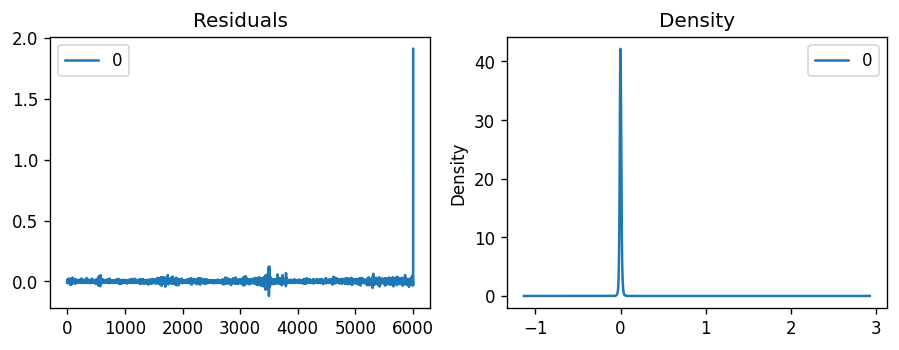

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Model Validation

In [ ]:
######  ALTERNATE  ###########
start_1 = len(y_train_1)
end_1 = len(y_train_1) + len(y_test_1) - 1
pred_1 = model_fit.predict(start = start_1, end = end_1, typ = 'levels')
pred_1.index = df.Date[start_1:end_1+1]
print(pred_1)

Date
2015-06-05    1.462234
2015-06-08    1.452136
2015-06-09    1.461799
2015-06-10    1.459971
2015-06-11    1.457025
                ...   
2022-06-09    1.491672
2022-06-10    1.498480
2022-06-13    1.484000
2022-06-14    1.500475
2022-06-15    1.517077
Name: predicted_mean, Length: 1802, dtype: float64


In [ ]:
start = len(y_train)
end = len(y_train) + len(y_test) - 1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
pred.index = df.Date[start:end+1]
print(pred)

Date
2015-06-05    1.462234
2015-06-08    1.452136
2015-06-09    1.461799
2015-06-10    1.459971
2015-06-11    1.457025
                ...   
2017-03-30    1.405435
2017-03-31    1.399330
2017-04-03    1.398434
2017-04-04    1.401475
2017-04-05    1.411061
Name: predicted_mean, Length: 474, dtype: float64


In [ ]:
######  ALTERNATE  ###########
y_test_1.head()
y_test_1.index = df.Date[start_1:end_1+1]

In [ ]:
y_test.head()
y_test.index = df.Date[start:end+1]

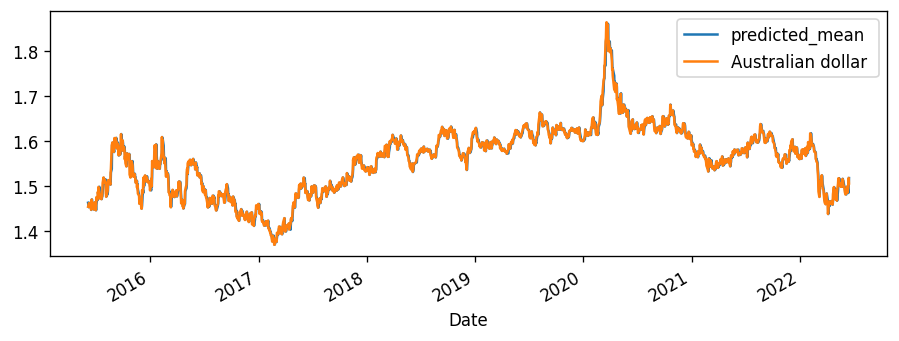

In [ ]:
######  ALTERNATE  ###########
pred_1.plot(legend = True)
y_test_1.plot(legend = True)

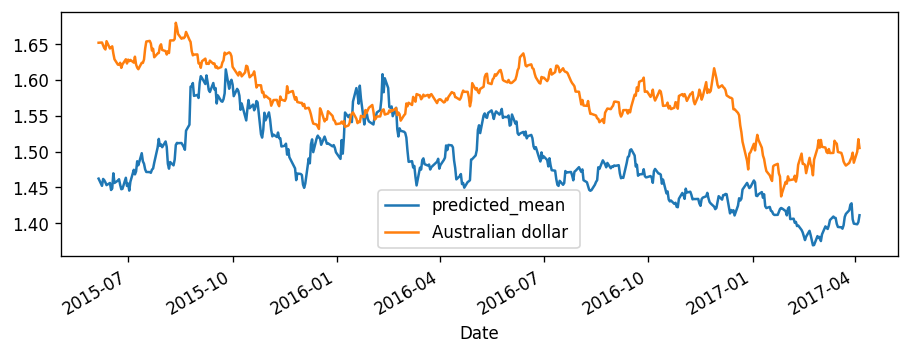

In [ ]:
pred.plot(legend = True)
y_test.plot(legend = True)

In [ ]:
######  ALTERNATE  ###########
pred_1.shape

(1802,)

In [ ]:
######  ALTERNATE  ###########
y_test_1.mean()

1.5571719200887901

In [ ]:
pred.shape

(474,)

In [ ]:
y_test.mean()

1.5739132911392404

In [ ]:
######  ALTERNATE  ###########
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred_1,y_test_1))
print(rmse)

0.008673518612721691


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,y_test))
print(rmse)

0.10203552576655162


In [ ]:
model_final = ARIMA(df['Australian dollar '], order = (2,1,2))
model_final = model_final.fit()
df.tail()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL,HWES1
4,2022-06-09,1.4985,1.3506,0.85653,8.4317,143.93,1348.99,1.0743,16.4132,1.491631,1.491597,1.492287,1.492263,1.495020
3,2022-06-10,1.4845,1.3484,0.85048,8.3031,141.69,1344.25,1.0578,16.5209,1.498431,1.498397,1.497816,1.497748,1.495165
2,2022-06-13,1.4998,1.3435,0.85850,8.2071,140.51,1349.93,1.0455,16.8070,1.484431,1.484398,1.485110,1.485117,1.494720
1,2022-06-14,1.5174,1.3522,0.86578,8.2048,140.62,1346.72,1.0452,16.7959,1.499731,1.499697,1.499756,1.499688,1.494932
0,2022-06-15,1.5051,1.3498,0.86328,8.1883,140.49,1346.86,1.0431,16.7111,1.517331,1.517295,1.517406,1.517489,1.495868


Model Testing

In [ ]:
index_future_dates = pd.date_range(start = '2022-06-16', end = '2023-06-16')
print(index_future_dates)

DatetimeIndex(['2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25',
               ...
               '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10',
               '2023-06-11', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', length=366, freq='D')


In [ ]:
######  ALTERNATE  ###########
pred_1 = model_final.predict(start = len(df), end = len(df) + 365, typ = 'levels').rename('ARIMA predictions')
pred_1.index = index_future_dates
print(pred_1)

2022-06-16    1.504331
2022-06-17    1.504541
2022-06-18    1.504403
2022-06-19    1.504421
2022-06-20    1.504392
                ...   
2023-06-12    1.504372
2023-06-13    1.504372
2023-06-14    1.504372
2023-06-15    1.504372
2023-06-16    1.504372
Freq: D, Name: ARIMA predictions, Length: 366, dtype: float64


In [ ]:
pred = model_final.predict(start = len(df), end = len(df) + 365, typ = 'levels').rename('ARIMA predictions')
pred.index = index_future_dates
print(pred)

2022-06-16    1.504331
2022-06-17    1.504541
2022-06-18    1.504403
2022-06-19    1.504421
2022-06-20    1.504392
                ...   
2023-06-12    1.504372
2023-06-13    1.504372
2023-06-14    1.504372
2023-06-15    1.504372
2023-06-16    1.504372
Freq: D, Name: ARIMA predictions, Length: 366, dtype: float64


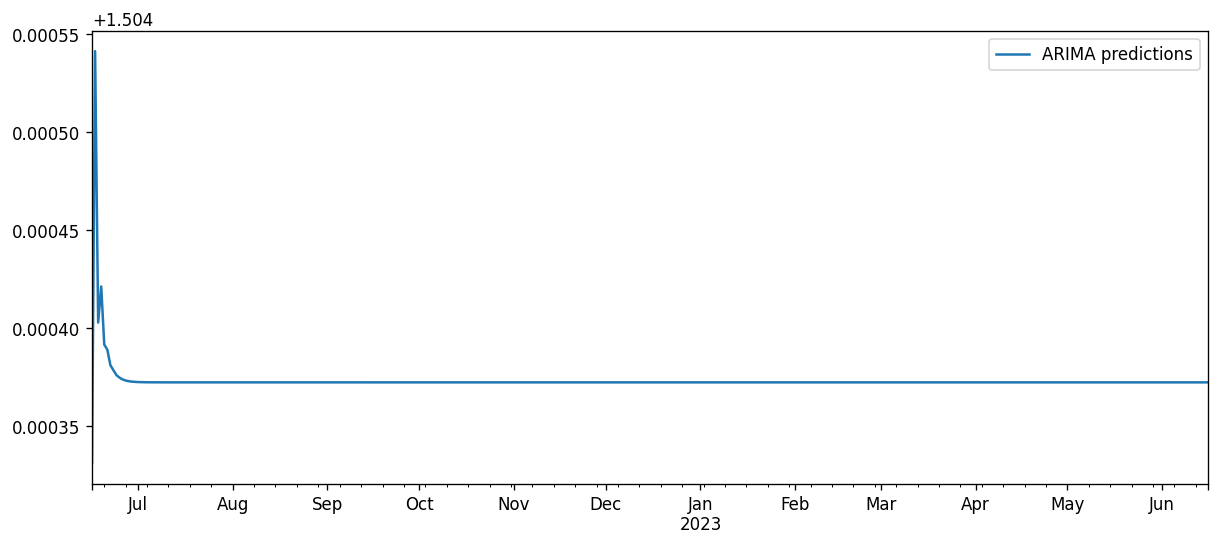

In [ ]:
######  ALTERNATE  ###########
pred_1.plot(figsize = (12,5), legend = True)

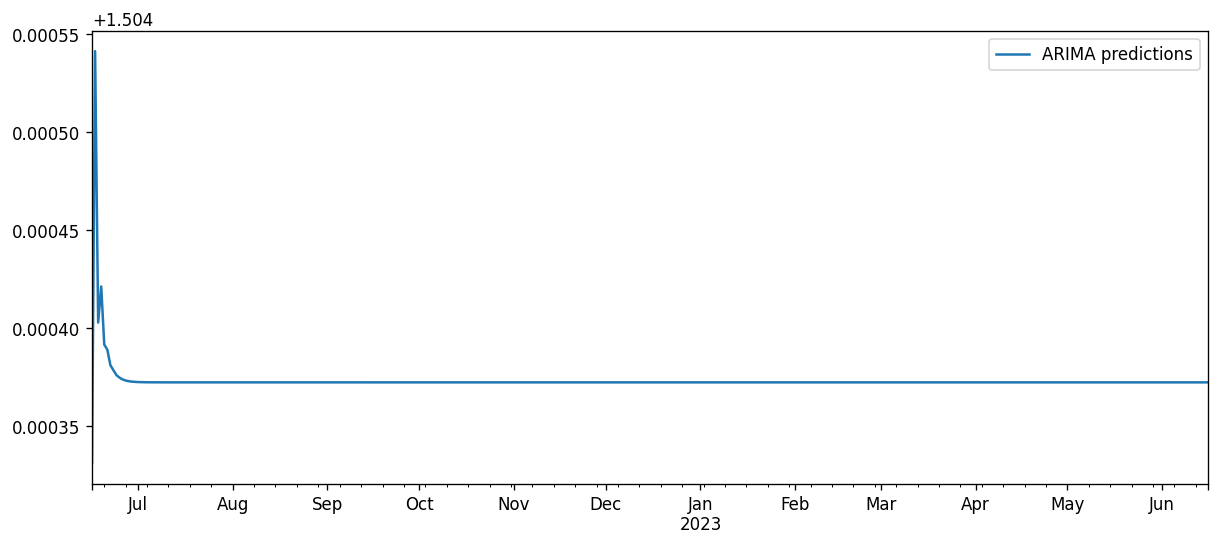

In [ ]:
pred.plot(figsize = (12,5), legend = True)

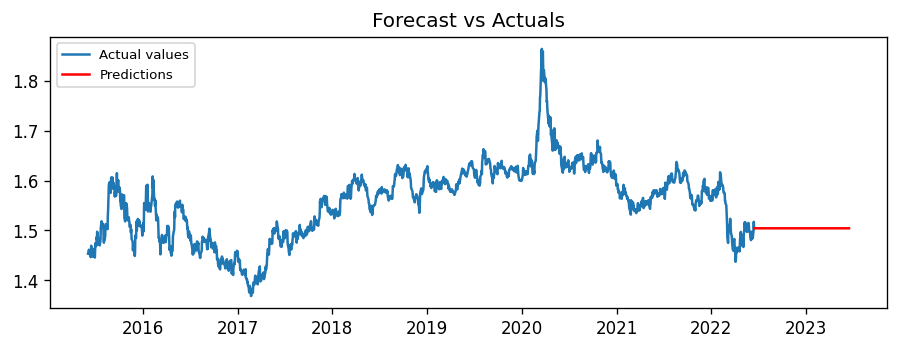

In [ ]:
######  ALTERNATE  ###########
plt.plot(y_test_1, label = 'Actual values')
plt.plot(pred_1, color='red', label = 'Predictions')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

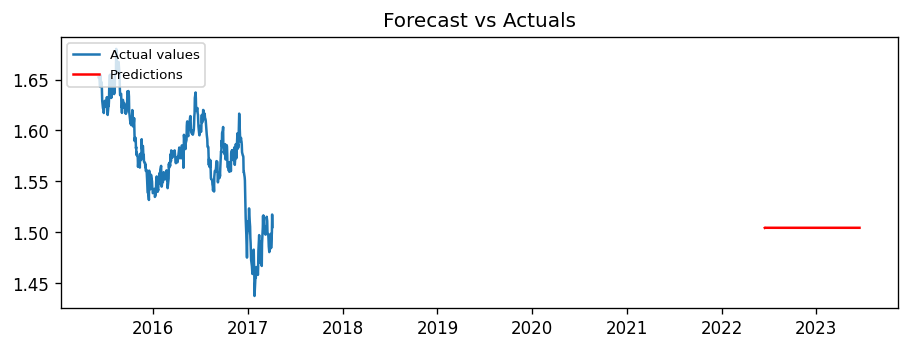

In [ ]:
plt.plot(y_test, label = 'Actual values')
plt.plot(pred, color='red', label = 'Predictions')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Result Evaluation

Holt-Winter's Method

Model Training

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
dff = df

In [ ]:
#df[df.isnull().any(axis=1)]

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand,rolling_mean
1970-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dff2 = df.dropna()

In [ ]:
df.isnull().sum()

Date                   0
Australian dollar      0
Canadian dollar        0
UK pound sterling      0
Hong Kong dollar       0
Japanese yen           0
Korean won             0
US dollar              0
South African rand     0
dtype: int64

In [ ]:
#dff2.isnull().sum()

Date                   0.0
Australian dollar      0.0
Canadian dollar        0.0
UK pound sterling      0.0
Hong Kong dollar       0.0
Japanese yen           0.0
Korean won             0.0
US dollar              0.0
South African rand     0.0
dtype: float64

In [ ]:
# Set the frequency of the date time index as Monthly start as indicated by the data
#dff2.index.freq = 'D'

# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

Model Validation

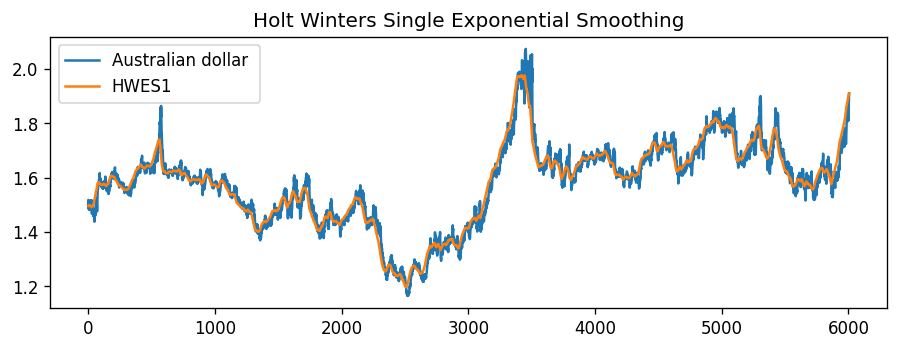

In [ ]:
df['HWES1'] = SimpleExpSmoothing(df['Australian dollar ']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Australian dollar ','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

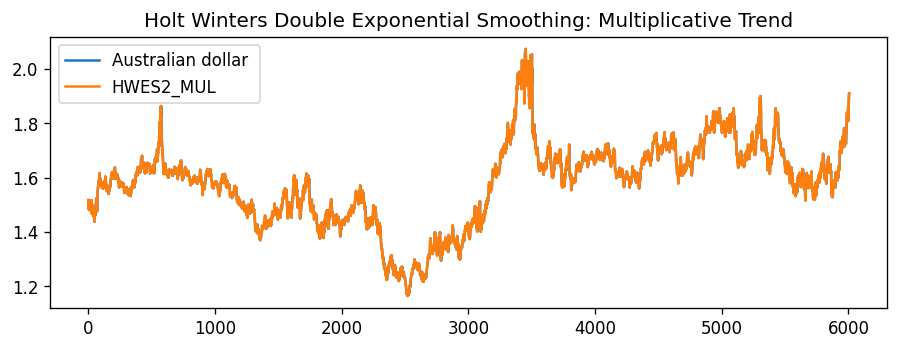

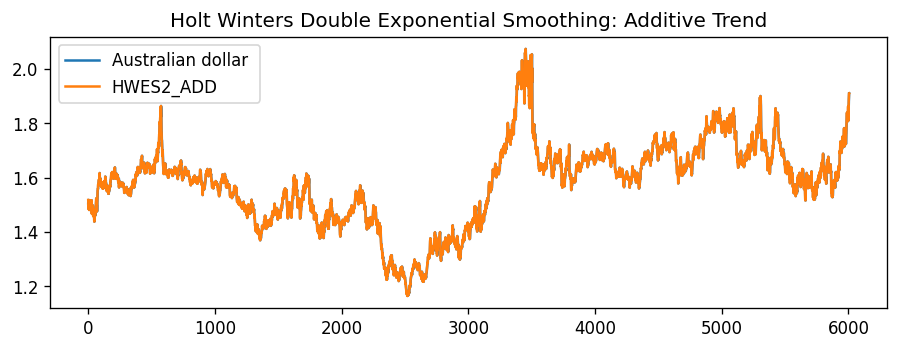

In [ ]:
df['HWES2_ADD'] = ExponentialSmoothing(df['Australian dollar '],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Australian dollar '],trend='mul').fit().fittedvalues
df[['Australian dollar ','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Multiplicative Trend');
df[['Australian dollar ','HWES2_ADD']].plot(title='Holt Winters Double Exponential Smoothing: Additive Trend');

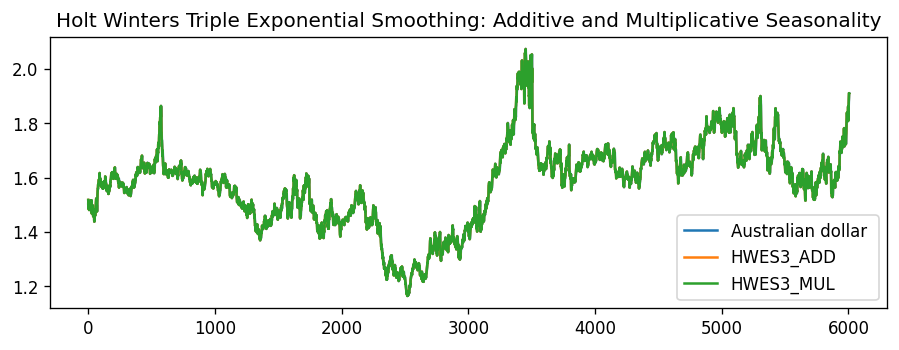

In [ ]:
df['HWES3_ADD'] = ExponentialSmoothing(df['Australian dollar '],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['Australian dollar '],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df[['Australian dollar ','HWES3_ADD', 'HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

Model testing

In [ ]:
######  ALTERNATE  ###########
fitted_model_1 = ExponentialSmoothing(y_train_1,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_1 = fitted_model_1.forecast(601)

NameError: ignored

In [ ]:
#fitted_model = ExponentialSmoothing(train_airline['Australian dollar ']],trend=’mul’,seasonal=’mul’,seasonal_periods=12).fit()
fitted_model = ExponentialSmoothing(y_train,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(601)

In [ ]:
df['Date']

6005   1999-01-04
6004   1999-01-05
6003   1999-01-06
6002   1999-01-07
6001   1999-01-08
          ...    
4      2022-06-09
3      2022-06-10
2      2022-06-13
1      2022-06-14
0      2022-06-15
Name: Date, Length: 6006, dtype: datetime64[ns]

In [ ]:
start = len(y_train)
end = len(y_train) + len(y_test) - 1
fitted_model = ExponentialSmoothing(y_train,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(474)
pred = model_fit.predict(start = start, end = end, typ = 'levels')
pred.index = df.Date[start:end+1]
print(pred)

Date
2015-06-05    1.462234
2015-06-08    1.452136
2015-06-09    1.461799
2015-06-10    1.459971
2015-06-11    1.457025
                ...   
2017-03-30    1.405435
2017-03-31    1.399330
2017-04-03    1.398434
2017-04-04    1.401475
2017-04-05    1.411061
Name: predicted_mean, Length: 474, dtype: float64


In [ ]:
index_future_dates = pd.date_range(start = '2022-06-16', end = '2023-10-02')
print(index_future_dates)
#test_predictions = model_final.predict(start = len(df), end = len(df) + 365, typ = 'levels').rename('ARIMA predictions')
test_predictions.index = index_future_dates

DatetimeIndex(['2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25',
               ...
               '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28', '2023-09-29', '2023-09-30',
               '2023-10-01', '2023-10-02'],
              dtype='datetime64[ns]', length=474, freq='D')


In [ ]:
test_predictions

2022-06-16    1.461896
2022-06-17    1.461972
2022-06-18    1.460823
2022-06-19    1.460890
2022-06-20    1.460708
                ...   
2023-09-28    1.412000
2023-09-29    1.410850
2023-09-30    1.410917
2023-10-01    1.410735
2023-10-02    1.410278
Freq: D, Length: 474, dtype: float64

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

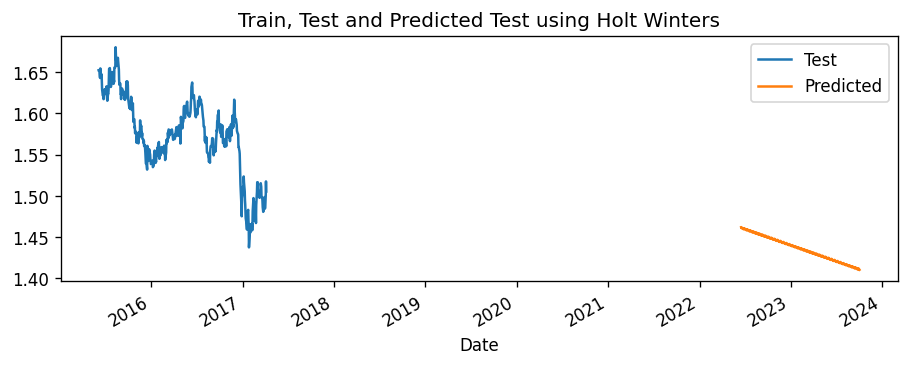

In [ ]:
y_test.plot(legend = True, label = 'Test')
test_predictions.plot(legend = True, label = 'Predicted')
plt.title('Train, Test and Predicted Test using Holt Winters')

Result Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(y_test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(y_test,test_predictions)}')

Mean Absolute Error = 0.13803005399065688
Mean Squared Error = 0.020581392172606194


In [ ]:
df['Australian dollar '].mean(), np.sqrt(df['Australian dollar '].var())

(1.578278837828838, 0.15121613322523386)

LSTM Model

Model Training

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/euro-daily-hist_1999_2022_updated.csv', parse_dates = True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dff.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,15-06-2022,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.529,18.0465,1.0431,16.7111
1,14-06-2022,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.566,18.0600,1.0452,16.7959
2,13-06-2022,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.425,18.0495,1.0455,16.8070
3,10-06-2022,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.774,18.0116,1.0578,16.5209
4,09-06-2022,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.079,18.5104,1.0743,16.4132


In [ ]:
#Renaming the column names by removing the extra characters and changing the term 'Period/Unit' to 'Date'
dff.rename(columns = lambda x: x.replace('[', ''), inplace=True)
dff.rename(columns = lambda x: x.replace(']', ''), inplace=True)
dff.rename(columns = lambda x : x.replace("Period\\Unit:", 'Date'), inplace = True)
dff.head()

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,15-06-2022,1.5051,1.9558,5.3164,1.3498,1.0435,7.0013,NaN,24.703,7.4392,...,4.9427,NaN,10.6278,1.4519,NaN,NaN,36.529,18.0465,1.0431,16.7111
1,14-06-2022,1.5174,1.9558,5.3329,1.3522,1.0394,7.0417,NaN,24.749,7.4403,...,4.9443,NaN,10.6220,1.4541,NaN,NaN,36.566,18.0600,1.0452,16.7959
2,13-06-2022,1.4998,1.9558,5.2785,1.3435,1.0375,7.0434,NaN,24.724,7.4397,...,4.9459,NaN,10.6160,1.4538,NaN,NaN,36.425,18.0495,1.0455,16.8070
3,10-06-2022,1.4845,1.9558,5.1718,1.3484,1.0404,7.0868,NaN,24.705,7.4389,...,4.9442,NaN,10.5255,1.4620,NaN,NaN,36.774,18.0116,1.0578,16.5209
4,09-06-2022,1.4985,1.9558,5.2506,1.3506,1.0495,7.1722,NaN,24.689,7.4391,...,4.9453,NaN,10.5045,1.4779,NaN,NaN,37.079,18.5104,1.0743,16.4132


In [ ]:
#Keeping the Necessary Columns
cols = ['Date','Australian dollar ', 'Canadian dollar ', 'UK pound sterling ', 'Hong Kong dollar ', 'Japanese yen ', 'Korean won ', 'US dollar ', 'South African rand ']
dff = dff[cols]

In [ ]:
dff.dtypes

Date                    object
Australian dollar      float64
Canadian dollar        float64
UK pound sterling      float64
Hong Kong dollar       float64
Japanese yen           float64
Korean won             float64
US dollar              float64
South African rand     float64
dtype: object

In [ ]:
#Converting the 'Date' column to 'Datetime' datatype
dff['Date'] = pd.to_datetime(dff['Date'], format = '%d-%m-%Y')

In [ ]:
#Converting the exchange rates column to float datatype
dff["Australian dollar "] = pd.to_numeric(dff["Australian dollar "])
dff["Canadian dollar "] = pd.to_numeric(dff["Canadian dollar "])   
dff["UK pound sterling "] = pd.to_numeric(dff["UK pound sterling "])
dff["Hong Kong dollar "] = pd.to_numeric(dff["Hong Kong dollar "])                  
dff["Japanese yen "] = pd.to_numeric(dff["Japanese yen "])            
dff["Korean won "] = pd.to_numeric(dff["Korean won "])              
dff["US dollar "] = pd.to_numeric(dff["US dollar "])               
dff["South African rand "] = pd.to_numeric(dff["South African rand "])

In [ ]:
dff.dtypes

Date                   datetime64[ns]
Australian dollar             float64
Canadian dollar               float64
UK pound sterling             float64
Hong Kong dollar              float64
Japanese yen                  float64
Korean won                    float64
US dollar                     float64
South African rand            float64
dtype: object

In [ ]:
dff = dff.sort_values(by = 'Date')

In [ ]:
dff.isnull().sum()

Date                   0
Australian dollar      0
Canadian dollar        0
UK pound sterling      0
Hong Kong dollar       0
Japanese yen           0
Korean won             0
US dollar              0
South African rand     0
dtype: int64

In [ ]:
dff.head()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand
6005,1999-01-04,1.9100,1.8004,0.71110,9.1332,133.73,1398.59,1.1789,6.9358
6004,1999-01-05,1.8944,1.7965,0.71220,9.1341,130.96,1373.01,1.1790,6.7975
6003,1999-01-06,1.8820,1.7711,0.70760,9.1010,131.42,1359.54,1.1743,6.7307
6002,1999-01-07,1.8474,1.7602,0.70585,9.0131,129.43,1337.16,1.1632,6.8283
6001,1999-01-08,1.8406,1.7643,0.70940,9.0302,130.09,1366.73,1.1659,6.7855


In [ ]:
start = 0
end = len(dff)
#pred = model_fit.predict(start = start, end = end, typ = 'levels')
dff.index = dff.Date[start:end+1]

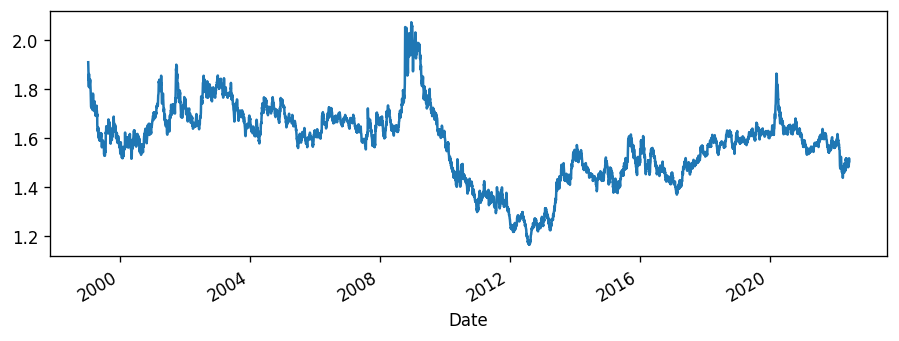

In [ ]:
dff['Australian dollar '].plot()

In [ ]:
len(dff)

6006

In [ ]:
y_train

6005    1.9100
6004    1.8944
6003    1.8820
6002    1.8474
6001    1.8406
         ...  
1806    1.4338
1805    1.4341
1804    1.4342
1803    1.4321
1802    1.4618
Name: Australian dollar , Length: 4204, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
train = dff.iloc[:4204]
test = dff.iloc[4204:]

In [ ]:
y_train2 = y_train.array.reshape(-1,1)
y_test2 = y_test.array.reshape(-1,1)
scaler.fit(y_train2)
scaled_train = scaler.transform(y_train2)
scaled_test = scaler.transform(y_test2)

In [ ]:
scaled_train[:10]

array([[0.82025066],
       [0.80310026],
       [0.7894679 ],
       [0.7514292 ],
       [0.74395339],
       [0.71405013],
       [0.70921284],
       [0.76748021],
       [0.73812665],
       [0.74197449]])

In [ ]:
scaled_test[:10]

array([[0.53682938],
       [0.53715919],
       [0.53276165],
       [0.52858399],
       [0.52649516],
       [0.53924802],
       [0.5280343 ],
       [0.52935356],
       [0.53133245],
       [0.52022867]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#define generator
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [ ]:
X,y = generator[0]
print(X.flatten())
print(y)

[0.82025066 0.80310026 0.7894679  0.7514292  0.74395339 0.71405013
 0.70921284 0.76748021 0.73812665 0.74197449 0.7314204  0.73175022
 0.70635444 0.71811785 0.72405453 0.73416887 0.74230431 0.73372911
 0.72812225 0.70888303 0.68634565 0.67084433 0.65633245 0.64885664
 0.62170185 0.61466579 0.64962621 0.65193492 0.63632366 0.63984169]
[[0.62818821]]


In [ ]:
X.shape

(1, 30, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#define model
model = Sequential()
model.add(LSTM(100,activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model
model.fit(generator, epochs = 10)

Epoch 1/10
4174/4174 [==============================] - 67s 16ms/step - loss: 1.8616e-04
Epoch 2/10
4174/4174 [==============================] - 60s 14ms/step - loss: 1.9007e-04
Epoch 3/10
4174/4174 [==============================] - 57s 14ms/step - loss: 1.8917e-04
Epoch 4/10
4174/4174 [==============================] - 59s 14ms/step - loss: 1.8925e-04
Epoch 5/10
4174/4174 [==============================] - 60s 14ms/step - loss: 1.8939e-04
Epoch 6/10
4174/4174 [==============================] - 59s 14ms/step - loss: 1.8977e-04
Epoch 7/10
4174/4174 [==============================] - 58s 14ms/step - loss: 1.8799e-04
Epoch 8/10
4174/4174 [==============================] - 58s 14ms/step - loss: 1.8793e-04
Epoch 9/10
4174/4174 [==============================] - 56s 13ms/step - loss: 1.8330e-04
Epoch 10/10
4174/4174 [==============================] - 58s 14ms/step - loss: 1.8744e-04


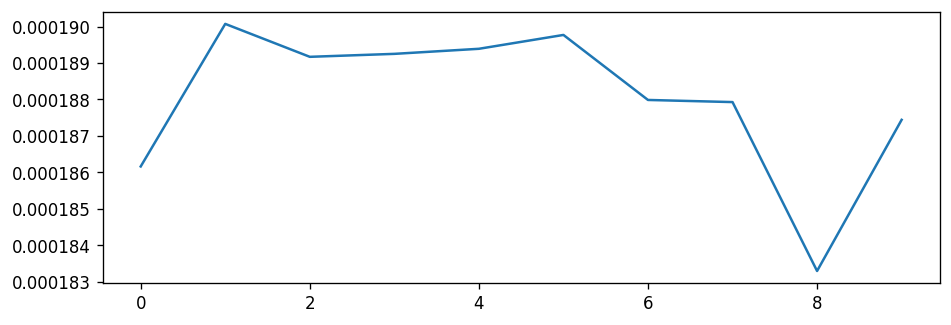

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-30:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.33021885]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.53682938])

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
  #get the predictionvalue for the first batch
  current_pred = model.predict(current_batch)[0]
  #appendthe prediction into the array
  test_predictions.append(current_pred)
  #use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [ ]:
current_batch.shape

(1, 30, 1)

In [ ]:
test_predictions

In [ ]:
test.head()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand
Date,,,,,,,,,
2015-06-05,2015-06-05,1.4534,1.4023,0.7317,8.6979,139.97,1249.74,1.1218,13.9126
2015-06-08,2015-06-08,1.4615,1.3879,0.7318,8.6536,139.84,1252.08,1.1162,14.0463
2015-06-09,2015-06-09,1.4606,1.3889,0.7354,8.7211,139.56,1258.68,1.1249,13.9876
2015-06-10,2015-06-10,1.4571,1.3801,0.7284,8.7446,138.69,1255.00,1.1279,13.9499
2015-06-11,2015-06-11,1.4533,1.3839,0.7266,8.7078,138.95,1252.23,1.1232,13.9601


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

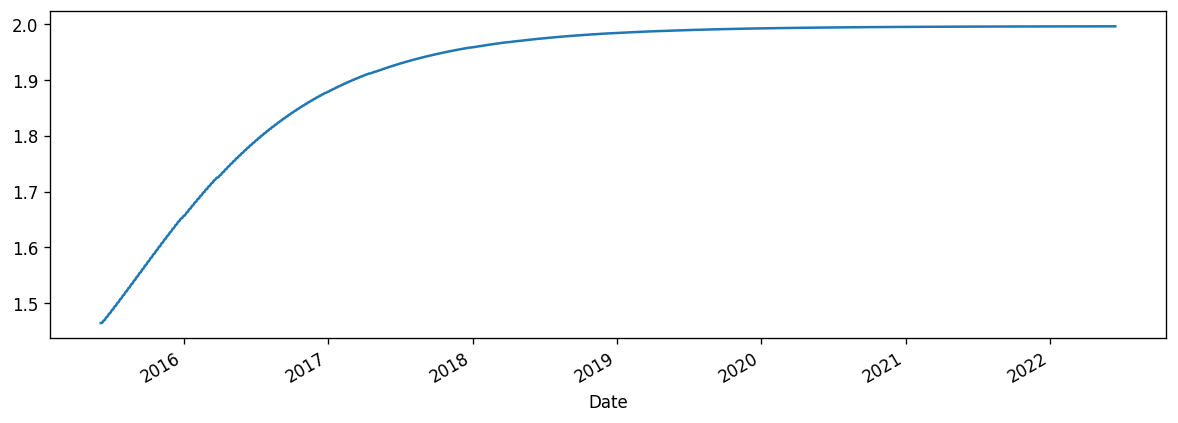

In [ ]:
test['Predictions'].plot(figsize = (12,4))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Australian dollar '], test['Predictions']))
print(rmse)

0.3784158023229982


In [ ]:
test.head()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand,Predictions
Date,,,,,,,,,,
2015-06-05,2015-06-05,1.4534,1.4023,0.7317,8.6979,139.97,1249.74,1.1218,13.9126,1.464267
2015-06-08,2015-06-08,1.4615,1.3879,0.7318,8.6536,139.84,1252.08,1.1162,14.0463,1.464470
2015-06-09,2015-06-09,1.4606,1.3889,0.7354,8.7211,139.56,1258.68,1.1249,13.9876,1.465247
2015-06-10,2015-06-10,1.4571,1.3801,0.7284,8.7446,138.69,1255.00,1.1279,13.9499,1.466224
2015-06-11,2015-06-11,1.4533,1.3839,0.7266,8.7078,138.95,1252.23,1.1232,13.9601,1.467316


In [ ]:
test.tail()

,Date,Australian dollar,Canadian dollar,UK pound sterling,Hong Kong dollar,Japanese yen,Korean won,US dollar,South African rand,Predictions
Date,,,,,,,,,,
2022-06-09,2022-06-09,1.4985,1.3506,0.85653,8.4317,143.93,1348.99,1.0743,16.4132,1.996675
2022-06-10,2022-06-10,1.4845,1.3484,0.85048,8.3031,141.69,1344.25,1.0578,16.5209,1.996676
2022-06-13,2022-06-13,1.4998,1.3435,0.85850,8.2071,140.51,1349.93,1.0455,16.8070,1.996677
2022-06-14,2022-06-14,1.5174,1.3522,0.86578,8.2048,140.62,1346.72,1.0452,16.7959,1.996678
2022-06-15,2022-06-15,1.5051,1.3498,0.86328,8.1883,140.49,1346.86,1.0431,16.7111,1.996679


In [ ]:
index_future_dates2 = pd.date_range(start = '2022-06-16', end = '2023-06-16')
print(index_future_dates2)

DatetimeIndex(['2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25',
               ...
               '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10',
               '2023-06-11', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', length=366, freq='D')


In [ ]:
predictions_final = model_final.predict(start = len(df), end = len(df) + 365, typ = 'levels').rename('LSTM' predictions')
predictions_final.index = index_future_dates
print(predictions_final)

In [ ]:
pred.plot(figsize = (12,5), legend = True)
plt.plot(y_test, label = 'Actual values')
plt.plot(pred, color='red', label = 'Predictions')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Model Testing